## Análise Exploratória  

1. Profile Report
2. Gráficos internações  
---

### Profile Report

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport

In [20]:
uf = "RJ"
uf_code = 33

In [21]:
file = pd.read_csv("../visualizing-health-regionalization-brazil/data/"+uf+"/"+uf+"_sih_flow.csv")

file = file[file['mun_res']>uf_code*10000][file['mun_res']<(uf_code+1)*10000]
file = file[file['mun_cnes']>uf_code*10000][file['mun_cnes']<(uf_code+1)*10000]

file.uf_code = file.uf_code.astype('string')
file.mun_res = file.mun_res.astype('string')
file.mun_cnes = file.mun_cnes.astype('string')

prof = ProfileReport(file)
prof.to_file(output_file=uf+"_flow.html")

<ipython-input-21-3bfb2eb73d2b>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  file = file[file['mun_res']>uf_code*10000][file['mun_res']<(uf_code+1)*10000]
<ipython-input-21-3bfb2eb73d2b>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  file = file[file['mun_cnes']>uf_code*10000][file['mun_cnes']<(uf_code+1)*10000]


In [1]:
# reader=pd.read_stata("../../Downloads/SIH/SIH_SESSP.dta", chunksize=100000, convert_categoricals=False)

# i = 0
# for itm in reader:
#     pd.DataFrame(itm).to_csv("SESSP/"+str(i)+"_SIH.csv")
#     print(i)
#     i += 1

### Gráfico internações

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [9]:
uf = "RJ"
uf_code = 33

# import the municipalities shapes
mun_df = gpd.read_file("../data/%s/%s_mun.shp"%(uf, uf))

# import the patients flow data
df = pd.read_csv("../data/"+uf+"/"+uf+"_sih_flow.csv")

# removing incoming/outcomming hospitalizations out from the choosen state
df = df[df['mun_res']>uf_code*10000][df['mun_res']<(uf_code+1)*10000]
df = df[df['mun_cnes']>uf_code*10000][df['mun_cnes']<(uf_code+1)*10000]
years = 26
str_year = ''

<ipython-input-9-114fa68da0d9>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['mun_res']>uf_code*10000][df['mun_res']<(uf_code+1)*10000]
<ipython-input-9-114fa68da0d9>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['mun_cnes']>uf_code*10000][df['mun_cnes']<(uf_code+1)*10000]


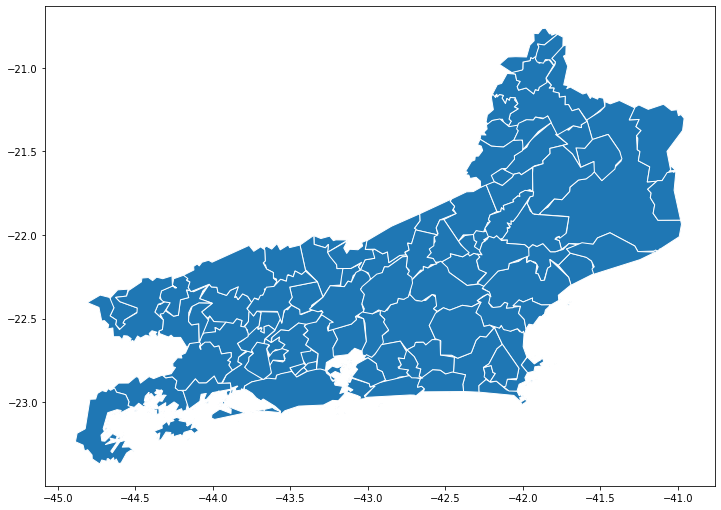

In [28]:
mun_df.geometry.plot(figsize=(12, 14), edgecolor='w')

In [18]:
tmp = df.merge(mun_df[['code', 'name']], left_on='mun_res', right_on='code').rename(columns={"name": "Município de origem"}).merge(mun_df[['code', 'name']], left_on='mun_cnes', right_on='code').rename(columns={"name": "Município de destino"})
tmp['Estado'] = tmp.shape[0]*["Rio de Janeiro"]
tmp

year  uf_code  mun_cnes   mun_res  nhospadm_total  code_x  \
0      1994       33    330010  330010.0           479.0  330010   
1      1995       33    330010  330010.0          6445.0  330010   
2      1996       33    330010  330010.0          6422.0  330010   
3      1997       33    330010  330010.0          6473.0  330010   
4      1998       33    330010  330010.0          6936.0  330010   
...     ...      ...       ...       ...             ...     ...   
39039  1996       33    330115  330100.0            11.0  330100   
39040  1995       33    330115  330500.0           847.0  330500   
39041  1996       33    330115  330500.0           874.0  330500   
39042  1997       33    330115  330500.0            53.0  330500   
39043  1996       33    330115  330415.0             2.0  330415   

         Município de origem  code_y Município de destino          Estado  
0             Angra dos Reis  330010       Angra dos Reis  Rio de Janeiro  
1             Angra dos Reis  330010       Angra dos Reis  Rio de Janeiro  
2             Angra dos Reis  330010       Angra dos Reis  Rio de Janeiro  
3             Angra dos Reis  330010       Angra dos Reis  Rio de Janeiro  
4             Angra dos Reis  330010       Angra dos Reis  Rio de Janeiro  
...                      ...     ...                  ...             ...  
39039  Campos dos Goytacazes  330115      Cardoso Moreira  Rio de Janeiro  
39040      São João da Barra  330115      Cardoso Moreira  Rio de Janeiro  
39041      São João da Barra  330115      Cardoso Moreira  Rio de Janeiro  
39042      São João da Barra  330115      Cardoso Moreira  Rio de Janeiro  
39043               Quissamã  330115      Cardoso Moreira  Rio de Janeiro  

[39044 rows x 10 columns]

In [20]:
tmp[['year', 'Estado', 'Município de origem', 'Município de destino', 'nhospadm_total']].rename(columns={"nhospadm_total": "Pacientes por fluxo",  
                   "year": "Ano"}).sort_values(by='Ano')

Ano          Estado Município de origem Município de destino  \
0      1994  Rio de Janeiro      Angra dos Reis       Angra dos Reis   
22084  1994  Rio de Janeiro            Araruama             Araruama   
21842  1994  Rio de Janeiro         Teresópolis   São João de Meriti   
21780  1994  Rio de Janeiro      Miguel Pereira   São João de Meriti   
21717  1994  Rio de Janeiro           Nilópolis   São João de Meriti   
...     ...             ...                 ...                  ...   
23803  2020  Rio de Janeiro     Duque de Caxias            Nilópolis   
23781  2020  Rio de Janeiro      Angra dos Reis            Nilópolis   
6158   2020  Rio de Janeiro         Teresópolis        Volta Redonda   
23880  2020  Rio de Janeiro     Arraial do Cabo            Nilópolis   
4063   2020  Rio de Janeiro   São João da Barra       Rio de Janeiro   

       Pacientes por fluxo  
0                    479.0  
22084                536.0  
21842                  1.0  
21780                  2.0  
21717                 39.0  
...                    ...  
23803                277.0  
23781                  9.0  
6158                   5.0  
23880                  4.0  
4063                  37.0  

[39044 rows x 5 columns]

In [21]:
df = df[df.year >=2015][df.year <= 2019]

years = 5

str_year = '_2015_2019'

<ipython-input-21-bb68ab5ebbde>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df.year >=2015][df.year <= 2019]


-----------------------------------------------------

In [104]:
# get the number of patients received by each municipality
imported_patients = df[['year', 'mun_cnes', 'nhospadm_total']].groupby(
    by = ['year', 'mun_cnes'], as_index = False).sum()
imported_patients = imported_patients.groupby(
    by = ['mun_cnes'], as_index = False).sum()
imported_patients = imported_patients[['mun_cnes', 'nhospadm_total']]

# get the number of patients received by each municipality
exported_patients = df[['year', 'mun_res', 'nhospadm_total']].groupby(
    by = ['year', 'mun_res'], as_index = False).sum()
exported_patients = exported_patients.groupby(
    by = ['mun_res'], as_index = False).sum()
exported_patients = exported_patients[['mun_res', 'nhospadm_total']]

internal_patients = df[df['mun_cnes'] == df['mun_res']][['year', 'mun_cnes', 'nhospadm_total']].groupby(
    by = ['mun_cnes'], as_index = False).sum()
internal_patients = internal_patients[['mun_cnes', 'nhospadm_total']]

In [105]:
gdf_imported = gpd.GeoDataFrame(imported_patients.merge(mun_df[['code', 'name', 'geometry']], left_on='mun_cnes', right_on='code'), 
                       geometry='geometry')
gdf_exported = gpd.GeoDataFrame(exported_patients.merge(mun_df[['code', 'name', 'geometry']], left_on='mun_res', right_on='code'), 
                       geometry='geometry')
gdf_internal = gpd.GeoDataFrame(internal_patients.merge(mun_df[['code', 'name', 'geometry']], left_on='mun_cnes', right_on='code'), 
                       geometry='geometry')

In [106]:
import numpy as np

gdf_imported.loc[:,'log_nhospadm_total'] = np.log10(gdf_imported['nhospadm_total'])
gdf_exported.loc[:,'log_nhospadm_total'] = np.log10(gdf_exported['nhospadm_total'])
gdf_internal.loc[:,'log_nhospadm_total'] = np.log10(gdf_internal['nhospadm_total'])

In [107]:
gdf_imported.log_nhospadm_total.mean()

4.09467808162408

In [108]:
def calc_trimming_values(gdf1, gdf2, gdf3, pop=False):
    upper, lower, mean = 0, 0, 0
    
    column = 'log_nhospadm_total'
    if pop: column = 'log_nhospadm_pop'
    
    upper += gdf1[column].quantile(0.99)
    upper += gdf2[column].quantile(0.99)
    upper += gdf3[column].quantile(0.99)
    
    lower += gdf1[column].quantile(0.01)
    lower += gdf2[column].quantile(0.01)
    lower += gdf3[column].quantile(0.01)
    
    mean += gdf1[column].mean()
    mean += gdf2[column].mean()
    mean += gdf3[column].mean()
    
#     median += gdf1[column].quantile(0.5)
#     median += gdf2[column].quantile(0.5)
#     median += gdf3[column].quantile(0.5)
    
    return upper/3, lower/3, mean/3
    

def trimming (gdf1, gdf2, gdf3, pop=False):
    upper_limit, lower_limit, mean = calc_trimming_values(gdf1, gdf2, gdf3, pop=pop)
    
    column = 'log_nhospadm_total'
    if pop: column = 'log_nhospadm_pop'
    
    gdf1 = gdf1[(gdf1[column] < upper_limit) & (gdf1[column] > lower_limit)]
    gdf2 = gdf2[(gdf2[column] < upper_limit) & (gdf2[column] > lower_limit)]
    gdf3 = gdf3[(gdf3[column] < upper_limit) & (gdf3[column] > lower_limit)]
    
    return gdf1, gdf2, gdf3, upper_limit, lower_limit, mean

In [109]:
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(16, 5))

a, b, c, u, l, m = trimming(gdf_imported, gdf_exported, gdf_internal)

sns.boxplot(x=a["log_nhospadm_total"], ax=axs[0])
sns.boxplot(x=b["log_nhospadm_total"], ax=axs[1])
sns.boxplot(x=c["log_nhospadm_total"], ax=axs[2])

In [110]:
def plot_choropleth(i, gdf, string, log, upper=False, lower=False, mean=False):  
    extent = gdf_imported.geometry.total_bounds
    hue = 'nhospadm_total'
    if log: hue = "log_"+hue

##     axs[i].set_title('Internações '+string, fontsize=14)
#     geoplot.choropleth(
#         gdf, hue=hue, extent=extent,
#         edgecolor='w', linewidth=1, ax=axs[i],
#         cmap='YlGnBu',
#         legend=True, legend_kwargs={'orientation': 'horizontal', 
#                                     'label': 'Internações (log 10)',
#                                     'values': [3, 4, 5, 6], 'shrink': 0.8,
#                                     'ticks': [3, 4, 5, 6]}
#     )
    
    ax = gdf.plot(column=hue, ax=axs[i], vmin=lower, vmax=upper, #vmin=2.3, vmax=6, #vmin=0.8, vmax=6, #vmin=3, vmax=6, #vmin=1, vmax=5.5,
            cmap='YlGnBu', edgecolor='w', legend=True, 
            legend_kwds={'orientation': 'horizontal', 'shrink': 0.9, 
                         'format': '$10^{%.1f}$' , 
                         'ticks': [mean-2*(mean-lower)/3, mean, mean+2*(upper-mean)/3],
                         'label': 'Internações'})
    axs[i].axis('off')
    axs[i].margins(0)
    
#     geoplot.choropleth(gdf.sort_values(by='log_nhospadm_total').tail(5), 
#         hue='nhospadm_total',
#         edgecolor='w', linewidth=1,
#         cmap='Spectral',
#         hatch='...', extent=extent, ax=axs[i]
#     )

In [111]:
import geoplot
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(16, 5))

a, b, c, u, l, m = trimming(gdf_imported, gdf_exported, gdf_internal)

plot_choropleth(0, gdf_imported, 'recebidas de fora', True, upper = u, lower = l, mean = m)
plot_choropleth(1, gdf_exported, 'enviadas para fora', True, upper = u, lower = l, mean = m)
plot_choropleth(2, gdf_internal, 'locais', True, upper = u, lower = l, mean = m)

# fig.suptitle('Total de internações por município no '+uf, fontsize=20)
fig.suptitle('.', fontsize=20)
plt.show()

In [112]:
gdf_imported.log_nhospadm_total.describe()

count    82.000000
mean      4.094678
std       0.638700
min       2.647383
25%       3.677081
50%       4.000741
75%       4.553895
max       6.180262
Name: log_nhospadm_total, dtype: float64

In [113]:
def format_func(value, tick_number):
    if tick_number == 1:
        return  r"$\mu=10^{%.1f}$"%value
    else:
        return r"$10^{%.1f}$"%value

def plot_single_choropleth(gdf, string, log=True, title=' ', txt='', upper=False, lower=False, mean=False):  

    extent = gdf_imported.geometry.total_bounds
    hue = 'nhospadm_total'
    if log: hue = "log_"+hue
    
    ax = gdf.plot(column=hue, figsize=(8, 10), vmin=lower, vmax=upper, #vmin=2.3, vmax=6, #vmin=3, vmax=6,
            cmap='YlGnBu', edgecolor='w', legend=True, 
            legend_kwds={'orientation': 'horizontal', 'shrink': 0.9, 
                         'pad':0.07, 'format': plt.FuncFormatter(format_func), #'$10^{%.1f}$', 
                         'ticks': [lower, mean, upper]})
#                          'ticks': [mean-2*(mean-lower)/3, mean, mean+2*(upper-mean)/3]})
    ax.axis('off')
    ax.margins(0)
    ax.figure.axes[1].tick_params(labelsize=24)
    ax.figure.axes[1].set_title('Internações '+txt,fontsize=30)
    
    plt.title(title,fontsize=36)
    
#     plt.savefig('/home/gabriely/Projetos/qualificacao/figuras/%s_%s%s_q.jpeg'%(string.split()[0], uf, str_year), bbox_inches='tight')

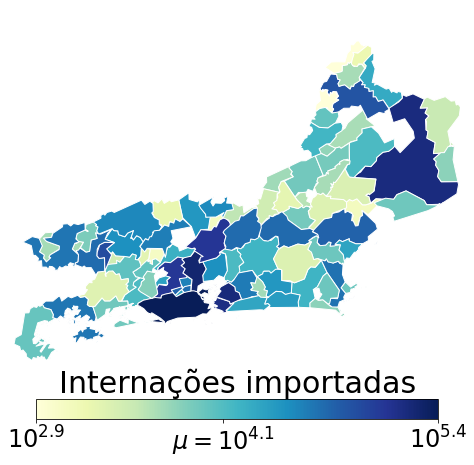

In [114]:
a, b, c, u, l, m = trimming(gdf_imported, gdf_exported, gdf_internal)

plot_single_choropleth(gdf_imported, 'recebidas de fora', txt='importadas', upper = u, lower = l, mean = m)
plot_single_choropleth(gdf_exported, 'enviadas para fora', txt='exportadas', title="Internações absolutas", upper = u, lower = l, mean = m)
plot_single_choropleth(gdf_internal, 'locais', txt='locais', upper = u, lower = l, mean = m)

## Ponderando pela população

https://ftp.ibge.gov.br/Censos/Censo_Demografico_2010/Sinopse/Unidades_da_Federacao/

In [2]:
import pandas as pd

In [42]:
uf = 'CE'

pop = pd.read_csv("populacao2010_%s.csv"%uf) # tab2_1_20SaoPaulo.xls # tab2_1_19RiodeJaneiro.xls
pop['população2010'] = pop['população2010'].map(lambda x: int(x.replace(' ', '')))
pop[1:].describe()

população2010
count   1.840000e+02
mean    4.593685e+04
std     1.825640e+05
min     4.164000e+03
25%     1.354125e+04
50%     1.997050e+04
75%     3.800500e+04
max     2.452185e+06

In [115]:
pop = pd.read_csv("total_populacao_%s.csv"%uf).dropna()
# pop[pop['Nome do município'] == 'Campos dos Goytacazes']
pop['code_pop'] = [str(code)[:6] for code in pop['Código do município']]
pop['pop_2010'] = [int(str(pop).replace(",", "")) for pop in pop['Total da população 2010']]

pop_df = pd.DataFrame(pop[['code_pop', 'pop_2010']].iloc[:-1,:].astype('int64'))
mun_df = mun_df.merge(pop_df, left_on='code', right_on='code_pop')

In [116]:
gdf_imported = gdf_imported.merge(mun_df[['code', 'pop_2010']], left_on='mun_cnes', right_on='code')
gdf_exported = gdf_exported.merge(mun_df[['code', 'pop_2010']], left_on='mun_res', right_on='code')
gdf_internal = gdf_internal.merge(mun_df[['code', 'pop_2010']], left_on='mun_cnes', right_on='code')

In [117]:
gdf_imported['pop_2010'] *= years # os cinco anos entre 2015 e 2019 (ou os 26 entre 1994 e 2020)
gdf_exported['pop_2010'] *= years
gdf_internal['pop_2010'] *= years

gdf_imported['nhospadm_pop'] = [gdf_imported.loc[i, 'nhospadm_total'] / gdf_imported.loc[i, 'pop_2010'] for i in range(gdf_imported.shape[0])]
gdf_exported['nhospadm_pop'] = [gdf_exported.loc[i, 'nhospadm_total'] / gdf_exported.loc[i, 'pop_2010'] for i in range(gdf_exported.shape[0])]
gdf_internal['nhospadm_pop'] = [gdf_internal.loc[i, 'nhospadm_total'] / gdf_internal.loc[i, 'pop_2010'] for i in range(gdf_internal.shape[0])]

In [118]:
import numpy as np

gdf_imported['log_nhospadm_pop'] = np.log10(gdf_imported['nhospadm_pop'])
gdf_exported['log_nhospadm_pop'] = np.log10(gdf_exported['nhospadm_pop'])
gdf_internal['log_nhospadm_pop'] = np.log10(gdf_internal['nhospadm_pop'])

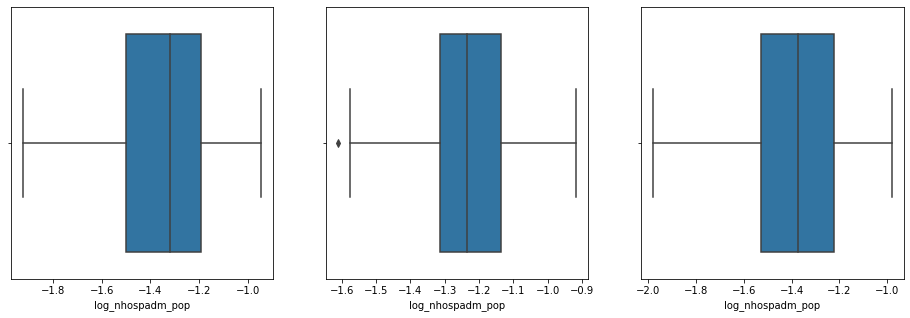

In [119]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

a, b, c, u, l, m = trimming(gdf_imported, gdf_exported, gdf_internal, pop=True)

sns.boxplot(x=a["log_nhospadm_pop"], ax=axs[0])
sns.boxplot(x=b["log_nhospadm_pop"], ax=axs[1])
sns.boxplot(x=c["log_nhospadm_pop"], ax=axs[2])

In [120]:
import geoplot
import matplotlib.pyplot as plt

def plot_choropleth_pop(i, gdf, string, log, upper=False, lower=False, mean=False):
    extent = gdf_imported.geometry.total_bounds
    hue = 'nhospadm_pop'
    if log: hue = "log_"+hue

    gdf.plot(column=hue, ax=axs[i], vmin=lower, vmax=upper,#vmax=-0.6, vmin=-2.6, #vmax=-0.76, vmin=-3.2, #vmax=-0.8, vmin=-2.2,
            cmap='RdYlGn', edgecolor='w', legend=True,
            legend_kwds={'orientation': 'horizontal', #'shrink': 0.9, 
                         'fmt':"{:.2f}", #'fontsize':14,
                         'ticks': [lower, mean, upper],
#                          'ticks': [mean-2*(mean-lower)/3, mean, mean+2*(upper-mean)/3],
                         'label': 'Internações/hab (log 10)'})
    axs[i].axis('off')
    axs[i].margins(0)
    
#     geoplot.choropleth(
#         gdf, hue=hue,
#         edgecolor='w', linewidth=1, ax=axs[i],
#         cmap='YlGnBu',
#         legend=True, legend_kwargs={'orientation': 'horizontal',
#                                     'label': "Internações (log 10)"}
#     )

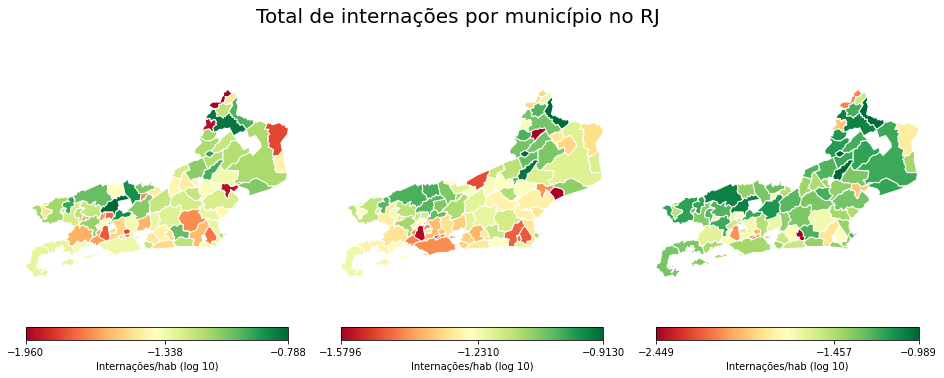

In [121]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

#a, b, c, u, l, m = trimming(gdf_imported, gdf_exported, gdf_internal, pop=True)
log = True
hue = 'nhospadm_pop'
if log: hue = "log_"+hue


plot_choropleth_pop(0, gdf_imported, 'recebidas de fora', log, 
                    upper = gdf_imported[hue].quantile(0.99), 
                    lower = gdf_imported[hue].quantile(0.01), 
                    mean = gdf_imported[hue].mean())
plot_choropleth_pop(1, gdf_exported, 'enviadas para fora', log, 
                    upper = gdf_exported[hue].quantile(0.99), 
                    lower = gdf_exported[hue].quantile(0.01), 
                    mean = gdf_exported[hue].mean())
plot_choropleth_pop(2, gdf_internal, 'locais', log,  
                    upper = gdf_internal[hue].quantile(0.99), 
                    lower = gdf_internal[hue].quantile(0.01), 
                    mean = gdf_internal[hue].mean())

fig.suptitle('Total de internações por município no '+uf, fontsize=20)
plt.show()

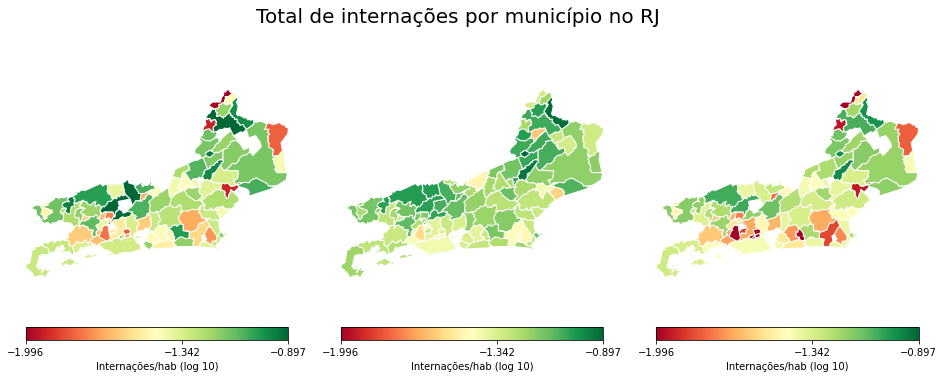

In [32]:
# fig, axs = plt.subplots(1, 3, figsize=(16, 6))

# a, b, c, u, l, m = trimming(gdf_imported, gdf_exported, gdf_internal, pop=True)

# plot_choropleth_pop(0, gdf_imported, 'recebidas de fora', True, upper = u, lower = l, mean = m)
# plot_choropleth_pop(1, gdf_exported, 'enviadas para fora', True, upper = u, lower = l, mean = m)
# plot_choropleth_pop(2, gdf_internal, 'locais', True, upper = u, lower = l, mean = m)

# fig.suptitle('Total de internações por município no '+uf, fontsize=20)
# plt.show()

In [54]:
10**(-2)*100

1.0

In [59]:
mun_df.shape[0] - gdf_imported.shape[0]

242

In [58]:
gdf_internal[gdf_internal.name == "Porto Alegre"]

mun_cnes  nhospadm_total  code_x          name  \
158    431490        526377.0  431490  Porto Alegre   

                                              geometry  log_nhospadm_total  \
158  MULTIPOLYGON (((-51.16347 -30.26269, -51.16410...            5.721297   

     code_y  pop_2010  nhospadm_pop  log_nhospadm_pop  
158  431490   7049695      0.074667         -1.126873

In [61]:
gdf_internal.sort_values(by='nhospadm_pop').head()

mun_cnes  nhospadm_total  code_x             name  \
121    431170             2.0  431170       Machadinho   
8      430063             9.0  430063  Amaral Ferrador   
96     430930           322.0  430930           Guaíba   
101    430980            32.0  430980           Ibiaçá   
124    431200            25.0  431200     Mariano Moro   

                                              geometry  log_nhospadm_total  \
121  POLYGON ((-51.66996 -27.51315, -51.65117 -27.5...            0.301030   
8    POLYGON ((-52.40993 -30.65692, -52.37543 -30.6...            0.954243   
96   POLYGON ((-51.30921 -30.05407, -51.30581 -30.1...            2.507856   
101  POLYGON ((-51.92986 -27.99644, -51.85240 -28.0...            1.505150   
124  POLYGON ((-52.16408 -27.31422, -52.10765 -27.3...            1.397940   

     code_y  pop_2010  nhospadm_pop  log_nhospadm_pop  
121  431170     27575      0.000073         -4.139486  
8    430063     31775      0.000283         -3.547843  
96   430930    476150      0.000676         -3.169888  
101  430980     23550      0.001359         -2.866841  
124  431200     11050      0.002262         -2.645422

In [122]:
def plot_single_choropleth_pop(gdf, string, log=True, title=' \n ', txt='', upper=False, lower=False, mean=False):  

    extent = gdf_imported.geometry.total_bounds
    hue = 'nhospadm_pop'
    if log: hue = "log_"+hue
    
    ax = gdf.plot(column=hue, figsize=(8, 10), vmin=lower, vmax=upper,#vmax=-0.6, vmin=-2.6, #vmax=-0.76, vmin=-3.2, #vmax=-0.8, vmin=-2.2,
            cmap='RdYlGn', edgecolor='w', legend=True, 
            legend_kwds={'orientation': 'horizontal', 'shrink': 0.9, 
                         'format': plt.FuncFormatter(format_func), #'$10^{%.1f}$' , 
                         'ticks': [lower, mean, upper],
#                          'ticks': [mean-2*(mean-lower)/3, mean, mean+2*(upper-mean)/3],
                         'pad':0.07})
    ax.axis('off')
    ax.margins(0)
    ax.figure.axes[1].tick_params(labelsize=24)
    ax.figure.axes[1].set_title('Internações '+txt,fontsize=30)
#     ax.figure.axes[1].set_major_formatter(plt.FuncFormatter(format_func))
    
    plt.title(title,fontsize=36)
    
    plt.savefig('/home/gabriely/Projetos/qualificacao/figuras/%s_%s_pop%s_q.jpeg'%(string.split()[0], uf, str_year), bbox_inches='tight')

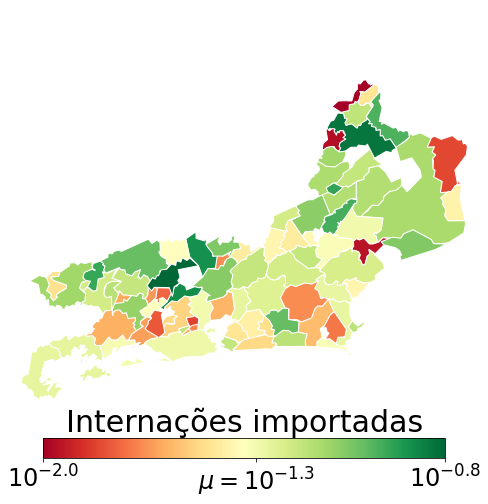

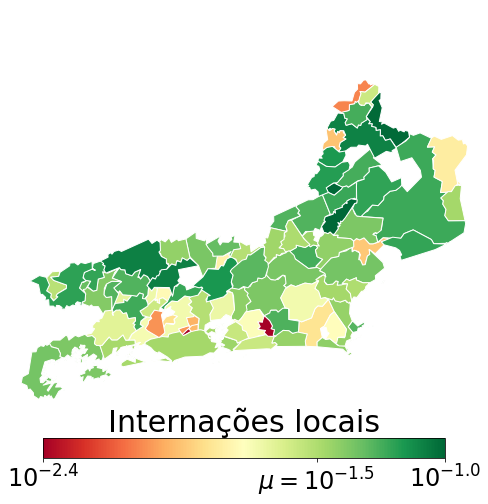

In [123]:
a, b, c, u, l, m = trimming(gdf_imported, gdf_exported, gdf_internal, pop=True)

plot_single_choropleth_pop(gdf_imported, 'recebidas de fora', txt="importadas", 
                    upper = gdf_imported['log_nhospadm_pop'].quantile(0.99), 
                    lower = gdf_imported['log_nhospadm_pop'].quantile(0.01), 
                    mean = gdf_imported['log_nhospadm_pop'].mean())
plot_single_choropleth_pop(gdf_exported, 'enviadas para fora', txt="exportadas", title="Internações em relação\nà população", 
                    upper = gdf_exported['log_nhospadm_pop'].quantile(0.99), 
                    lower = gdf_exported['log_nhospadm_pop'].quantile(0.01), 
                    mean = gdf_exported['log_nhospadm_pop'].mean())
plot_single_choropleth_pop(gdf_internal, 'locais', txt="locais", 
                    upper = gdf_internal['log_nhospadm_pop'].quantile(0.99), 
                    lower = gdf_internal['log_nhospadm_pop'].quantile(0.01), 
                    mean = gdf_internal['log_nhospadm_pop'].mean())

---------

In [552]:
gdf_imported.log_nhospadm_pop.describe()

count    335.000000
mean      -1.322166
std        0.405018
min       -2.696471
25%       -1.475648
50%       -1.224216
75%       -1.073104
max       -0.460960
Name: log_nhospadm_pop, dtype: float64

In [50]:
gdf_imported[gdf_imported.name == 'Terra de Areia']

Empty GeoDataFrame
Columns: [mun_cnes, nhospadm_total, code_x, name, geometry, log_nhospadm_total, code_y, pop_2010, nhospadm_pop, log_nhospadm_pop]
Index: []

In [190]:
gdf_exported.log_nhospadm_pop.describe()

count    496.000000
mean      -1.119046
std        0.113407
min       -1.744826
25%       -1.172508
50%       -1.101340
75%       -1.048240
max       -0.809302
Name: log_nhospadm_pop, dtype: float64

In [188]:
print(gdf_imported[['code_x', 'pop_2010', 'nhospadm_total']].corr().loc['pop_2010', 'nhospadm_total'])
print(gdf_exported[['code_x', 'pop_2010', 'nhospadm_total']].corr().loc['pop_2010', 'nhospadm_total'])
print(gdf_internal[['code_x', 'pop_2010', 'nhospadm_total']].corr().loc['pop_2010', 'nhospadm_total'])

0.949230231266621
0.990975275179864
0.9739389525729434


**RS** 

**Bahia** Ao olhar para a proporção de internações por habitantes na Figura XX, observamos uma maior uniformidade nos valores dos municípios do que nos valores absolutos apresentados na Figura XX, especiamente no segundo gráfico. Apesar de serem poucos casos, os gráficos fig..(i) e fig..(iii) são uniformes com alguns municípios de valores mais baixos, representando uma proporção mais baixa de internações atendidas em relação à população nesses municípios, de forma semelhante ao que vimos no Rio de Janeiro. Já o gráfico 
fig..(ii) apresenta uma proporção significante entre as internações municipais e sua 
densidade populacional, indicando alta correlação entre os dois valores (0.993). De forma 
geral, os três resultados apresentaram alta correlação entre número de habitantes e número 
de internações. Para (i), 0.987; para (ii), 0.993; e para (iii), 0.991.

**Rio** Em primeiro lugar, vemos nos gráficos da Figura \ref{fig:internacoes_rj_pop} que os valores dos municípios são mais uniformes, o que revela uma alta 
relação entre a quantidade de internações e a quantidade de residentes entre os municípios. Entretanto, em 
alguns casos encontramos valores um pouco mais distantes da média. Por exemplo, alguns municípios 
em \ref{fig:internacoes_rj_pop}(i) possuem valores mais altos quando os comparamos à média do estado. 
Isso representa que a proporção de internações recebidas de fora do município em relação à sua população é um valor mais elevado para estes municípios. 
Outros municípios em \ref{fig:internacoes_rj_pop}(i) e \ref{fig:internacoes_rj_pop}(iii) possuem valores mais baixos, o que representa uma proporção mais baixa de 
internações recebidas de fora e do próprio município, em relação à sua população. 
Embora consigamos visualizar essas diferenças, elas são bastante sutis. Para os três graficos apresentados temos uma alta correlação entre população e internações. Em (i), 
0.993; e em (ii) e (iii), 0.992. 
Esse tipo de análise proporcional das internações, apresentada pela Figura \ref{fig:internacoes_rj_pop}, favorece a compreensão da situação particular de cada município. 
Enquanto a Figura \ref{fig:internacoes_rj} apresenta uma visão geral da intensidade das internações pelo estado.

In [141]:
# (i)
i_min = gdf_imported[gdf_imported.log_nhospadm_pop == gdf_imported.log_nhospadm_pop.min()]
i_max = gdf_imported[gdf_imported.log_nhospadm_pop == gdf_imported.log_nhospadm_pop.max()]
print('(i) min:', i_min.name.to_list()[0], float(i_min.nhospadm_pop))
print('(i) max:', i_max.name.to_list()[0], float(i_max.nhospadm_pop))

# (ii)
ii_min = gdf_exported[gdf_exported.log_nhospadm_pop == gdf_exported.log_nhospadm_pop.min()]
ii_max = gdf_exported[gdf_exported.log_nhospadm_pop == gdf_exported.log_nhospadm_pop.max()]
print('(ii) min:', ii_min.name.to_list()[0], float(ii_min.nhospadm_pop))
print('(ii) max:', ii_max.name.to_list()[0], float(ii_max.nhospadm_pop))

# (iii)
iii_min = gdf_internal[gdf_internal.log_nhospadm_pop == gdf_internal.log_nhospadm_pop.min()]
iii_max = gdf_internal[gdf_internal.log_nhospadm_pop == gdf_internal.log_nhospadm_pop.max()]
print('(ii) min:', iii_min.name.to_list()[0], float(iii_min.nhospadm_pop))
print('(ii) max:', iii_max.name.to_list()[0], float(iii_max.nhospadm_pop))

(i) min: Cardoso Moreira 0.0054962581278370755
(i) max: Paracambi 0.3472282592710005
(ii) min: Mesquita 0.016420317745115997
(ii) max: Quatis 0.14582471538281686
(ii) min: Mesquita 0.002515485974806771
(ii) max: Paracambi 0.11895019625401577


--------------
## teste regiões

In [166]:
regions = pd.read_csv(
            "../visualizing-health-regionalization-brazil/data/%s/regions/%s_regions_table.csv"
            %(uf, uf))
regions.head(3)

CD_MUN  region
0  430003  7ª CRS
1  430005  6ª CRS
2  430010  4ª CRS

In [167]:
mun_df = mun_df.merge(regions, how = 'left', left_on = ['code'], right_on = ['CD_MUN'])
mun_df = mun_df.drop(columns=['CD_MUN'])

In [168]:
mun_df = mun_df.merge(imported_patients, how = 'left', left_on = ['code'], right_on = ['mun_cnes'])
mun_df = mun_df.drop(columns=['mun_cnes'])
mun_df = mun_df.rename(columns={'nhospadm_total': 'imported_year_mean'})

In [169]:
mun_df = mun_df.merge(exported_patients, how = 'left', left_on = ['code'], right_on = ['mun_res'])
mun_df = mun_df.drop(columns=['mun_res'])
mun_df = mun_df.rename(columns={'nhospadm_total': 'exported_year_mean'})

In [170]:
mun_df = mun_df.merge(internal_patients, how = 'left', left_on = ['code'], right_on = ['mun_cnes'])
mun_df = mun_df.drop(columns=['mun_cnes'])
mun_df = mun_df.rename(columns={'nhospadm_total': 'internal_year_mean'})

In [172]:
table = mun_df[['region', 'imported_year_mean', 'exported_year_mean', 'internal_year_mean']].groupby(
    by = ['region'], as_index = False).sum()
print(table.to_latex(index=False))

\begin{tabular}{lrrr}
\toprule
   region &  imported\_year\_mean &  exported\_year\_mean &  internal\_year\_mean \\
\midrule
  10ª CRS &           1011726.0 &           1055194.0 &            961133.0 \\
  11ª CRS &            446904.0 &            489708.0 &            296503.0 \\
  12ª CRS &            423826.0 &            477441.0 &            319787.0 \\
  13ª CRS &            613705.0 &            659547.0 &            517109.0 \\
  14ª CRS &            474511.0 &            503077.0 &            386825.0 \\
 15ª  CRS &            268462.0 &            372189.0 &            194348.0 \\
  16ª CRS &            694465.0 &            764827.0 &            489376.0 \\
  17ª CRS &            488334.0 &            457142.0 &            338141.0 \\
  18ª CRS &            475991.0 &            621927.0 &            302751.0 \\
  19ª CRS &            474326.0 &            508073.0 &            303024.0 \\
   1ª CRS &           7091848.0 &           6198677.0 &           4655321.0 \\
   2ª 